<a href="https://colab.research.google.com/github/17aabbas/Boston-Housing-Data/blob/main/Boston_Housing_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load necessary libraries
## *Import numpy, pandas, seaborn, and matplot*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data loading

In [2]:
BostonDF = pd.read_csv('/content/sample_data/HousingData.csv') # pd.read_csv('filepath') to store housing data in BostonDF variable
BostonDF.head() # Review first 5 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# EDA

In [3]:
BostonDF.info() # Review data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
BostonDF.describe() # Review descriptive statistics

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
BostonDF.isnull().sum() # Review missing values

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [6]:
BostonDF['CRIM'].fillna(BostonDF['CRIM'].mean(), inplace=True) # Replace missing values with mean
BostonDF['ZN'].fillna(BostonDF['ZN'].mean(), inplace=True) # Replace missing values with mean
BostonDF['INDUS'].fillna(BostonDF['INDUS'].mean(), inplace=True) # Replace missing values with mean
BostonDF['CHAS'].fillna(BostonDF['CHAS'].mode()[0], inplace=True) # Replace missing values with most common mode
BostonDF['AGE'].fillna(BostonDF['AGE'].mean(), inplace=True) # Replace missing values with mean
BostonDF['LSTAT'].fillna(BostonDF['LSTAT'].mean(), inplace=True) # Replace missing values with mean


In [7]:
BostonDF.isnull().sum() # Review missing values to verify they are filled

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


##EDA is completed, we filled in null values, viewed columns, and types.
###CRIM - per capita crime rate by town
###ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
###INDUS - proportion of non-retail business acres per town.
###CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
###NOX - nitric oxides concentration (parts per 10 million)
###RM - average number of rooms per dwelling
###AGE - proportion of owner-occupied units built prior to 1940
###DIS - weighted distances to five Boston employment centres
###RAD - index of accessibility to radial highways
###TAX - full-value property-tax rate per 10,000 dollars
###PTRATIO - pupil-teacher ratio by town
###B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
###LSTAT - % lower status of the population
###MEDV - Median value of owner-occupied homes in 1000 dollars's

In [8]:
BostonDF['PRICE'] = BostonDF['MEDV']
BostonDF.drop('MEDV', axis=1, inplace=True)

BostonDF.head()

# We renamed the MEDV to PRICE since MEDV could be a little confusing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


# Data Visualization

PRICE      1.000000
RM         0.695360
ZN         0.365943
B          0.333461
DIS        0.249929
CHAS       0.183844
CRIM      -0.379695
AGE       -0.380223
RAD       -0.381626
NOX       -0.427321
TAX       -0.468536
INDUS     -0.478657
PTRATIO   -0.507787
LSTAT     -0.721975
Name: PRICE, dtype: float64


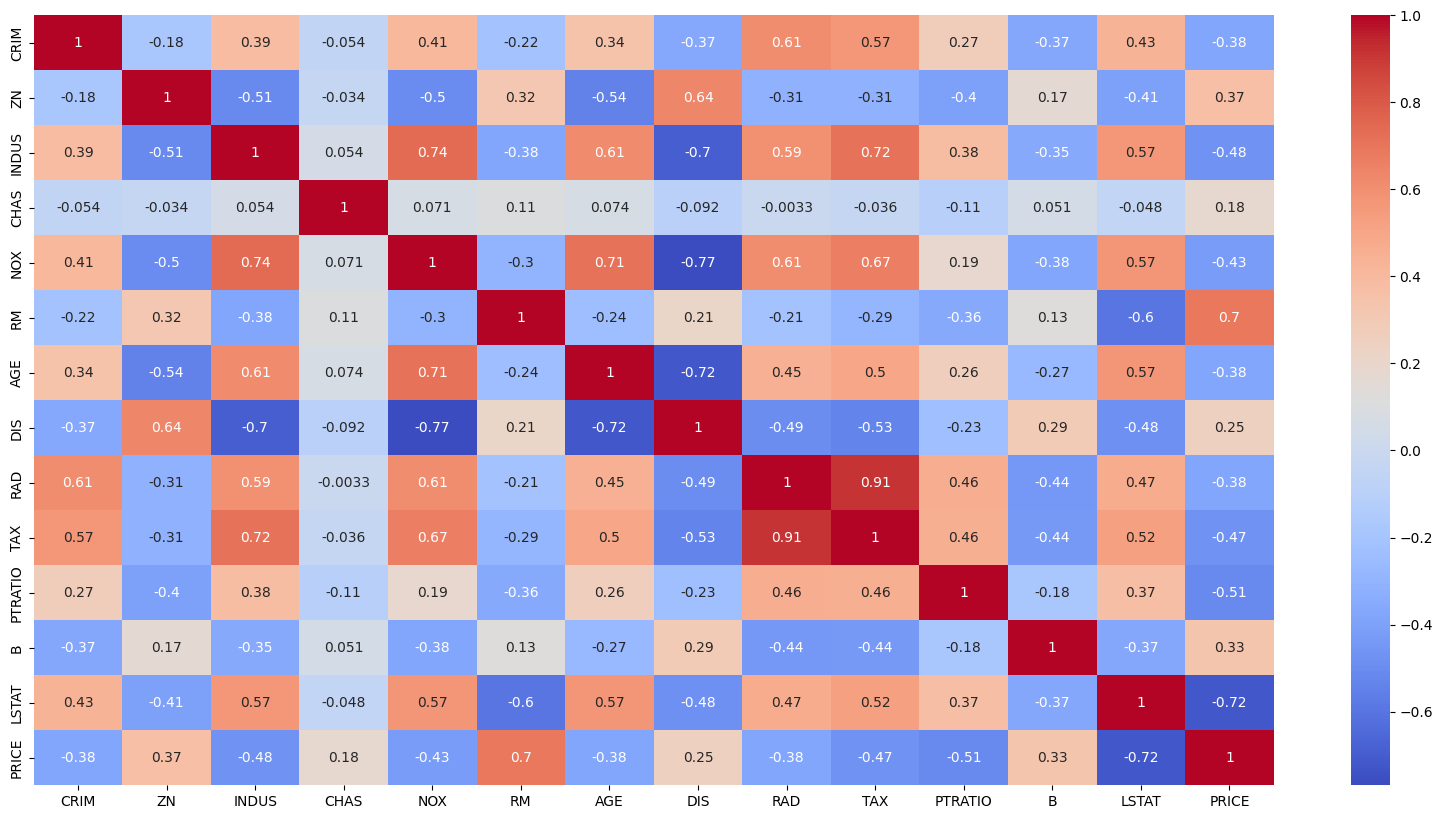

In [9]:
corr_matrix = BostonDF.corr() # storing correlation matrix in corr_matrix
print(corr_matrix['PRICE'].sort_values(ascending = False)) # Descending in correlation order with PRICE

plt.figure(figsize = (20,10))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

    Feature  Importance
5        RM    0.531166
12    LSTAT    0.257832
7       DIS    0.074312
0      CRIM    0.043405
4       NOX    0.022984
10  PTRATIO    0.018067
9       TAX    0.016401
6       AGE    0.012083
11        B    0.011483
2     INDUS    0.005936
8       RAD    0.004061
1        ZN    0.001348
3      CHAS    0.000922


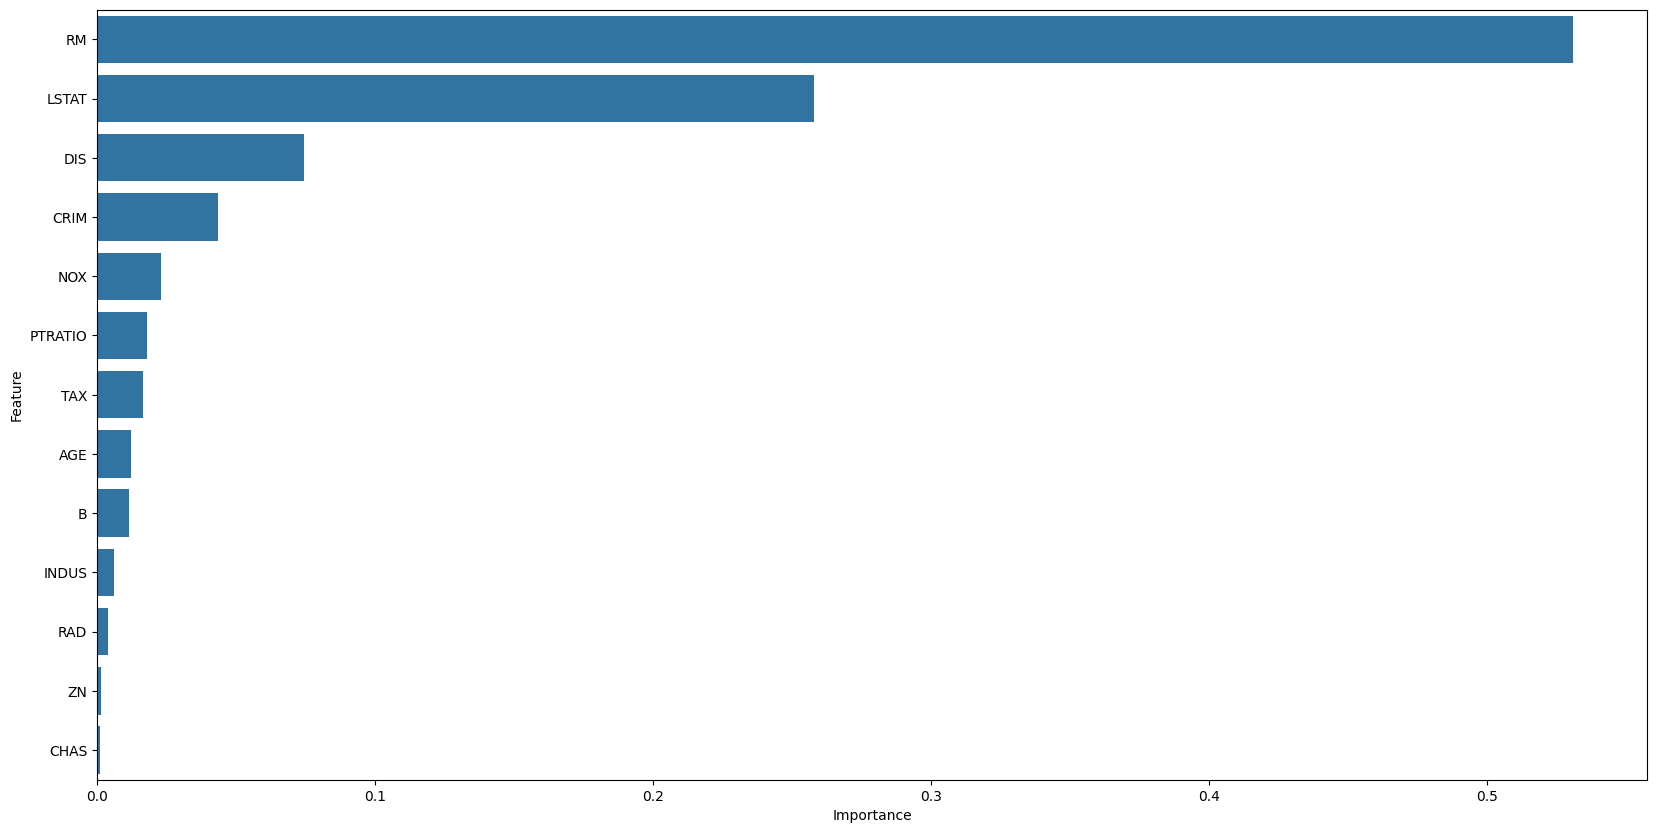

In [10]:
# We will look to drop unimportant features from our dataset

from sklearn.ensemble import RandomForestRegressor

X = BostonDF.drop('PRICE', axis = 1) # Set features to X
y = BostonDF['PRICE'] # Target to Y

model = RandomForestRegressor()
model.fit(X, y) # Fit the model to the data

feature_importance = model.feature_importances_ # Extract feature importance
feature_names = X.columns # Extract feature names

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)

print(importance_df) # Print the importance dataframe

plt.figure(figsize = (20,10))
sns.barplot( x = 'Importance', y = 'Feature', data = importance_df) # Plot the importance of each feature
plt.show()

In [11]:
BostonDF.drop(['ZN', 'CHAS'], axis = 1, inplace = True) # Drop least important features

In [12]:
BostonDF.head() # Verify columns are dropped

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


# Machine Learning
## We will use 3 models
### Linear Regression, Random Forest, Support Vector Regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
X = BostonDF.drop('PRICE', axis = 1) # Set features to X
y = BostonDF['PRICE'] # Target to Y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # Split the data into training and testing sets

In [15]:
print('Xtrain Shape: ', X_train.shape)
print('XTest Shape: ', X_test.shape)
print('YTrain Shape: ', y_train.shape)
print('YTest Shape: ', y_test.shape)

Xtrain Shape:  (404, 11)
XTest Shape:  (102, 11)
YTrain Shape:  (404,)
YTest Shape:  (102,)


### Linear Regression

In [16]:
model_lr = LinearRegression() # Create a linear regression model
model_lr.fit(X_train, y_train) # Fit the model to the training data
y_pred_lr = model_lr.predict(X_test) # Make predictions on the test data

mse_lr = mean_squared_error(y_test, y_pred_lr) # Calculate the mean squared error
r2_lr = r2_score(y_test, y_pred_lr) # Calculate the R-squared score

### Random Forest Regression

In [17]:
model_fr = RandomForestRegressor() # Create a random forest regression model
model_fr.fit(X_train, y_train) # Fit the model to the training data
y_pred_fr = model_fr.predict(X_test) # Make predictions on the test data

mse_fr = mean_squared_error(y_test, y_pred_fr) # Calculate the mean squared error
r2_fr = r2_score(y_test, y_pred_fr) # Calculate the R-squared score

### Support Vector Regression

In [18]:
model_svr = SVR() # Create a support vector regression model
model_svr.fit(X_train, y_train) # Fit the model to the training data
y_pred_svr = model_svr.predict(X_test) # Predict the target variable for the test data

mse_svr = mean_squared_error(y_test, y_pred_svr) # Calculate the mean squared error
r2_svr = r2_score(y_test, y_pred_svr) # Calculate the R-squared score

### Evaluation

In [19]:
print('Linear Regression Metrics:')
print('MSE:', mse_lr)
print('R-squared:', r2_lr)

print('\nRandom Forest Regression Metrics:')
print('MSE:', mse_fr)
print('R-squared:', r2_fr)

print('\nSupport Vector Regression Metrics:')
print('MSE:', mse_svr)
print('R-squared:', r2_svr)

Linear Regression Metrics:
MSE: 26.270497594497577
R-squared: 0.6417681392890261

Random Forest Regression Metrics:
MSE: 9.072672549019616
R-squared: 0.8762824968516235

Support Vector Regression Metrics:
MSE: 54.23218027305207
R-squared: 0.26047480525463673


### Visualize Results

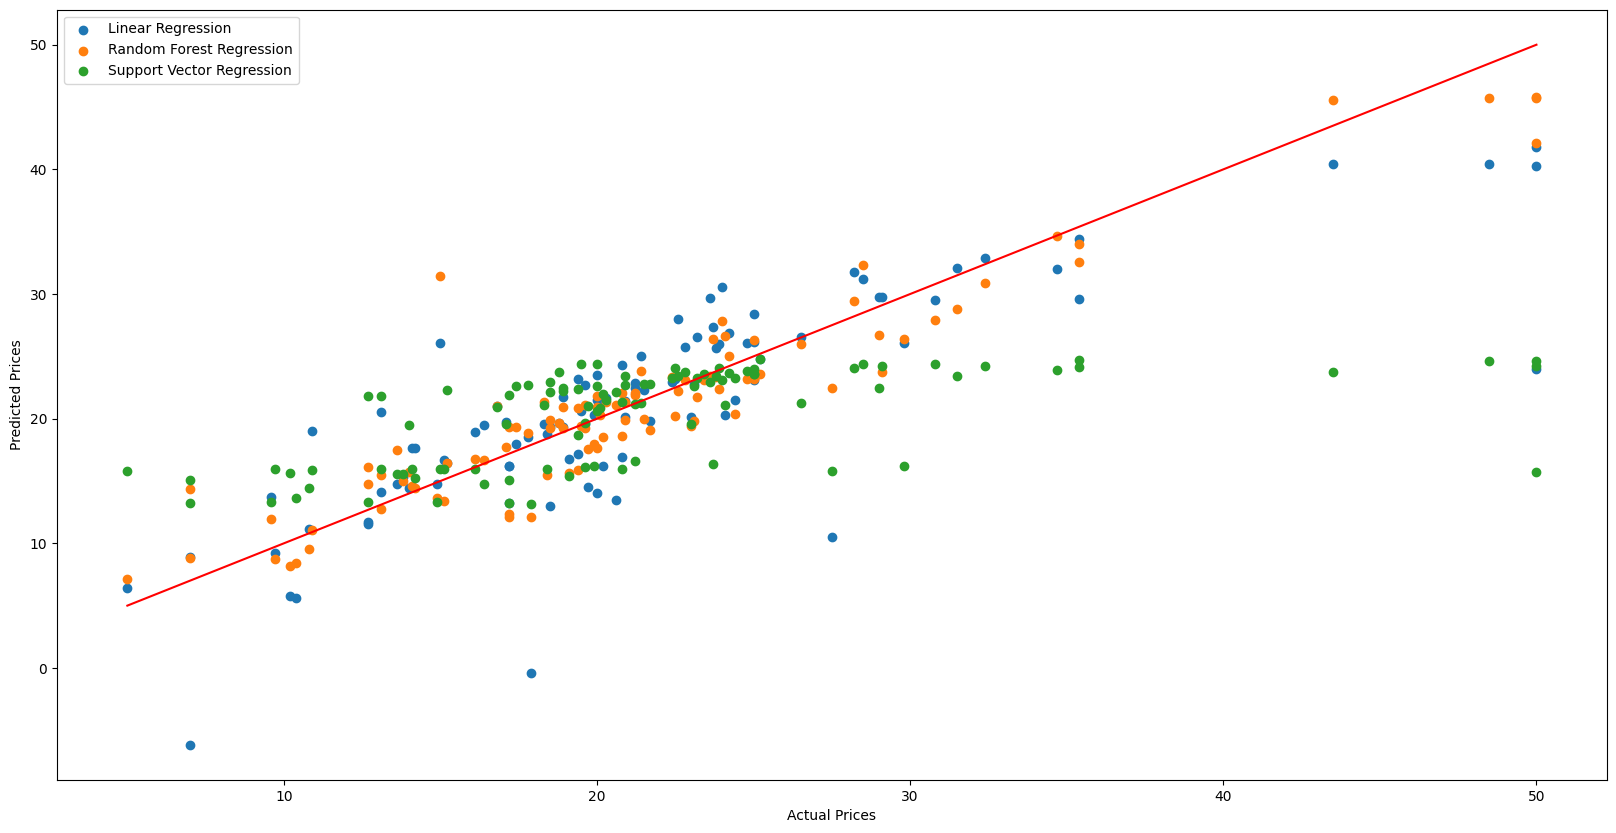

In [20]:
plt.figure(figsize = (20, 10))
plt.scatter(y_test, y_pred_lr, label = 'Linear Regression')
plt.scatter(y_test, y_pred_fr, label = 'Random Forest Regression')
plt.scatter(y_test, y_pred_svr, label = 'Support Vector Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

## Hyperparameter tuning

### Linear Regression

In [21]:
from sklearn.linear_model import Ridge # Ridge Regression
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100] # regularization strength
}

model_ridge = Ridge() # Create a ridge regression
grid_search_ridge = GridSearchCV(estimator = model_ridge, param_grid = param_grid_ridge, cv = 5, scoring = 'r2', verbose = 2) # Create a grid search object
grid_search_ridge.fit(X_train, y_train) # Fit the grid search object to the training data

best_ridge = grid_search_ridge.best_estimator_ # Get the best estimator
y_pred_ridge = best_ridge.predict(X_test) # Predict the target variable for the test data

mse_ridge = mean_squared_error(y_test, y_pred_ridge) # Calculate the mean squared error
r2_ridge = r2_score(y_test, y_pred_ridge) # Calculate the R-squared score

print("Best alpha for Ridge:", grid_search_ridge.best_params_)
print("Tuned Ridge Mean Squared Error:", mse_ridge)
print("Tuned Ridge R-squared Score:", r2_ridge)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ........................................

### Random Forest Regression

In [23]:
param_grid_rf = {
    'n_estimators': [100, 200, 300], # number of trees in the forest
    'max_depth': [10, 20, 30, None], # maximum depth of the tree
    'min_samples_split': [2, 5, 10], # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4], # minimum number of samples required to be at a leaf
    'max_features': ['auto', 'sqrt', 'log2'], # maximum number of features to consider when looking for the best split
    'bootstrap': [True, False] # method of selecting samples for training each tree

}

grid_search_rf = GridSearchCV(estimator = model_fr, param_grid = param_grid_rf, cv = 5, scoring = 'r2', verbose = 2) # Create a grid search object
grid_search_rf.fit(X_train, y_train) # Fit the grid search object to the training data

best_rf = grid_search_rf.best_estimator_ # Get the best estimator
y_pred_rf_tuned = best_rf.predict(X_test) # Predict the target variable for the test data

mse_fr_tuned = mean_squared_error(y_test, y_pred_rf_tuned) # Calculate the mean squared error
r2_fr_tuned = r2_score(y_test, y_pred_rf_tuned) # Calculate the R-squared score

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Tuned Random Forest Mean Squared Error:", mse_fr_tuned)
print("Tuned Random Forest R-squared Score:", r2_fr_tuned)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

Best parameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest Mean Squared Error: 7.738630534313711
Tuned Random Forest R-squared Score: 0.894473867284394


### Support Vector Regression

In [24]:
param_grid_svr = {
    'C': [0.1, 1, 10, 100], # regularization parameter
    'kernel': ['linear', 'rbf'], # kernel function
    'gamma': ['scale', 'auto'] # kernel coefficient
}

grid_search_svr = GridSearchCV(estimator = model_svr, param_grid = param_grid_svr, cv = 3, scoring = 'r2', verbose = 2) # Create a grid search object
grid_search_svr.fit(X_train, y_train) # Fit the grid search object to the training data

best_svr = grid_search_svr.best_estimator_ # Get the best estimator
y_pred_svr_tuned = best_svr.predict(X_test) # Predict the target variable for the test data

mse_svr_tuned = mean_squared_error(y_test, y_pred_svr_tuned) # Calculate the mean squared error
r2_svr_tuned = r2_score(y_test, y_pred_svr_tuned) # Calculate the R-squared

print("Best parameters for SVR:", grid_search_svr.best_params_)
print("Tuned SVR Mean Squared Error:", mse_svr_tuned)
print("Tuned SVR R-squared Score:", r2_svr_tuned)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.2s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.2s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto

### New Visuals

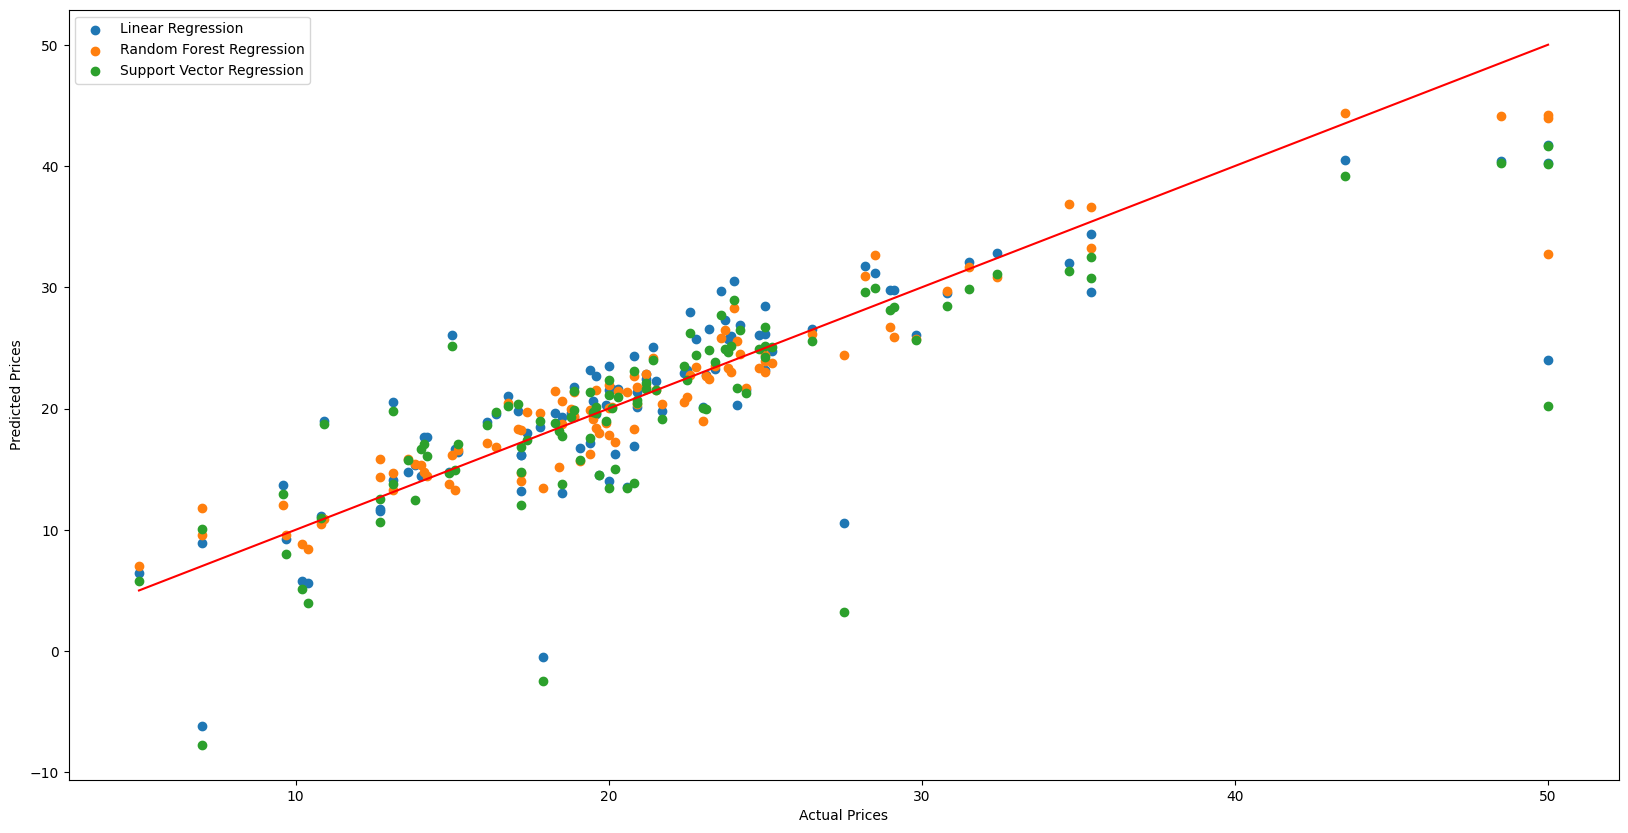

In [25]:
plt.figure(figsize = (20, 10))
plt.scatter(y_test, y_pred_ridge, label = 'Linear Regression')
plt.scatter(y_test, y_pred_rf_tuned, label = 'Random Forest Regression')
plt.scatter(y_test, y_pred_svr_tuned, label = 'Support Vector Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

# Conclusion

In [27]:
print(' Hypertuned Linear Regression Metrics:')
print('MSE:', mse_ridge)
print('R-squared:', r2_ridge)

print('\nHypertuned Random Forest Regression Metrics:')
print('MSE:', mse_fr_tuned)
print('R-squared:', r2_fr_tuned)

print('\nHypertuned Support Vector Regression Metrics:')
print('MSE:', mse_svr_tuned)
print('R-squared:', r2_svr_tuned)

 Hypertuned Linear Regression Metrics:
MSE: 26.27463758699831
R-squared: 0.641711685192124

Hypertuned Random Forest Regression Metrics:
MSE: 7.738630534313711
R-squared: 0.894473867284394

Hypertuned Support Vector Regression Metrics:
MSE: 31.628631029820156
R-squared: 0.5687031315338884


## The best model is the Random Forest Regression, yielding a r2 score of 0.89, which is a close match after hypertuning the parameters.

## The SVM model is underwhelming, and not recommended.